In [1]:
from scipy.io import loadmat
from displayData import displayData
import numpy as np
import matplotlib.pyplot as plt
from sigmoid import sigmoid
from predict import predict
import random
from sigmoidGradient import sigmoidGradient
from nnCostFunction import nnCostFunction
from displayData import correct_type
import pandas as pd

All methods

In [2]:
def build_data(Xs, Ys):
    data = []
    for i in range(Ys.shape[0]):
        row = [Ys[i]]
        for x in Xs[i]:
            row.append(x)
        data.append(row)
    data = np.array(data, dtype=object)
    return data

def build_data_frame(data):
    columns = ["Classes"]
    for i in range(1, data.shape[1]):
        columns.append(i)

    df = pd.DataFrame(data=data, index=np.arange(data.shape[0]), columns = columns)
    df
    return df


All starting parameters

In [9]:

input_layer_size = 400     # 20x20 Input Images of Digits
hidden_layer_size = 25     # 25 hidden units
num_labels = 10            # 10 labels, from 0 to 9

dataset = loadmat("digitdata.mat")
Xs = np.squeeze(dataset.get("X"))
Ys = np.squeeze(dataset.get("y"))

debug_weights = loadmat('debugweights.mat');

# Unroll parameters
Theta1 = debug_weights['Theta1']
Theta1_1d = np.reshape(Theta1, Theta1.size, order='F')
Theta2 = debug_weights['Theta2']
Theta2_1d = np.reshape(Theta2, Theta2.size, order='F')

nn_params = np.hstack((Theta1_1d, Theta2_1d))

print("Xs shape ", Xs.shape)
print("Ys shape ", Ys.shape)
print("Theta1 shape ", Theta1.shape)
print("Theta2 shape ", Theta2.shape)

data = build_data(Xs, Ys)

print("Data shape ", data.shape)

Xs shape  (5000, 400)
Ys shape  (5000,)
Theta1 shape  (25, 401)
Theta2 shape  (10, 26)
Data shape  (5000, 401)


In [4]:
df = build_data_frame(data)
df

,Classes,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data_indexes = range(data.shape[0])

choice_100 = random.choices(data_indexes, k=100)
classes_100 = np.array(df.iloc[choice_100, 0])
values_100 = np.array(df.iloc[choice_100, 1:])

print(classes_100)
print(values_100)
print(type(values_100[0,0]))

[5 1 4 4 5 1 8 8 4 10 9 4 9 10 7 9 8 8 5 2 4 6 9 1 6 3 7 4 6 7 1 8 10 4 7
 2 5 10 5 1 2 6 5 1 10 1 2 9 2 6 2 9 9 1 8 10 5 2 7 9 7 2 7 6 2 6 4 5 6 9
 2 2 5 6 8 4 3 8 1 6 10 4 3 4 10 9 6 2 1 7 5 8 9 6 4 6 1 8 8 5]
[[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]]
<class 'numpy.float64'>


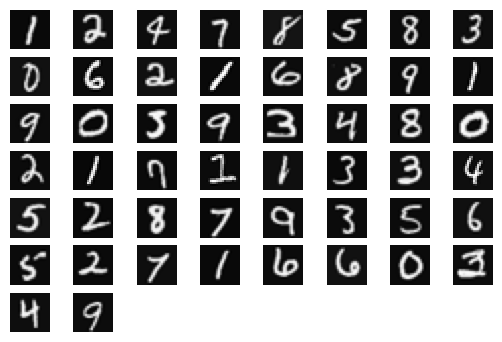

array([1, 2, 4, 7, 8, 5, 8, 3, 10, 6, 2, 1, 6, 8, 9, 1, 9, 10, 3, 9, 3, 4,
       8, 10, 2, 1, 7, 1, 1, 3, 3, 4, 5, 2, 8, 7, 9, 3, 5, 6, 5, 2, 7, 1,
       6, 6, 10, 3, 4, 9], dtype=object)

In [ ]:
displayData(values_100[:50])
classes_100[:50]

    

In [ ]:
pred = predict(Theta1, Theta2, values_100)
print(pred)
print(classes_100)
binary_answers = (pred == classes_100)
binary_answers


[ 8.  2.  8.  7.  8.  3.  8.  3.  8.  6.  2.  8.  6.  8.  8.  1.  9. 10.
  3.  9.  3.  4.  8. 10.  2.  8.  9.  2.  8.  3.  3.  4.  5.  2.  8.  7.
  9.  3.  8.  6.  5.  2.  8.  8.  6.  6. 10.  2.  4.  9.  8.  8.  3.  8.
  4.  3.  3.  9.  6.  8.  6.  6.  8.  3.  8.  8.  7.  9.  3. 10.  8.  6.
  8.  8.  7. 10.  9.  9.  5. 10.  8. 10. 10.  4.  8.  8.  6.  9.  6. 10.
  8.  6. 10.  8.  8.  8.  8.  8. 10.  7.]
[1 2 4 7 8 5 8 3 10 6 2 1 6 8 9 1 9 10 3 9 3 4 8 10 2 1 7 1 1 3 3 4 5 2 8
 7 9 3 5 6 5 2 7 1 6 6 10 3 4 9 6 1 3 8 4 3 1 9 6 5 6 6 8 3 1 7 7 9 3 10 9
 6 1 9 7 10 4 7 5 10 3 10 2 4 5 5 6 9 6 10 3 6 10 5 1 8 8 1 10 7]


array([False,  True, False,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True, False, False,  True,  True,  True,  True, False,  True,
       False, False,  True,  True, False, False,  True,  True, False,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True,  True, False, False,  True,  True, False,  True,
        True])

In [ ]:
correct_answer_count = np.zeros([10])
for i in range(len(binary_answers)):
    c = binary_answers[i]
    if (c == True):
        add_to = classes_100[i]
        if add_to == 10:
            add_to = 0
        correct_answer_count[add_to] += 1
# count_correct_answers()
print(correct_answer_count)

s = sum(binary_answers)
print(s/len(binary_answers))

accuracies = (pred == classes_100).mean()*100
print(accuracies)

[10.  1.  5. 10.  5.  3. 12.  5.  9.  7.]
0.67
67.0


In [ ]:
a = np.array([2,5,0.1,0,-10])

print(sigmoidGradient(a))


[1.04993585e-01 6.64805667e-03 2.49376040e-01 2.50000000e-01
 4.53958077e-05]


In [ ]:
lambda_value = 0.1
costFunction = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, values_100, classes_100, lambda_value)


TypeError: loop of ufunc does not support argument 0 of type numpy.float64 which has no callable exp method